In [1]:
import sklearn as skl
import pickle as pkl
import pandas as pd
import numpy as np

import sklearn.model_selection
import sklearn.svm
import sklearn.metrics

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
import seaborn as sns

from itertools import chain

In [2]:
import scipy as sp

In [3]:
import math
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data

In [4]:
import sys
sys.path.append("..") # or wherever the package is
import kuanglu

In [5]:
import scanpy as sc

In [6]:
import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "4"

## Create dataloaders

Note: samples must have the same number of genes (and of course in the same order). They can, however, have different number of cells, but you'll only be able to use `batch_size = 1`, because we matrices with different sizes cannot form a tensor.

It is possible in the future, by flanking them with zeros and carefully masking them out in several steps.

In [7]:
adata = sc.read_h5ad('data/demo1_sp_adata.h5ad')

train_Xs = []
chosen_slices = ['MsBrainAgingSpatialDonor_5_0', 'MsBrainAgingSpatialDonor_6_0', 
                 'MsBrainAgingSpatialDonor_7_0']
for i in chosen_slices:
    train_Xs.append(np.array(adata.X[adata.obs['donor_slice'] == i, :]))
    
validate_Xs = []
chosen_donors = ['MsBrainAgingSpatialDonor_8_0']
for i in chosen_donors:
    validate_Xs.append(np.array(adata.X[adata.obs['donor_slice'] == i, :]))
    
_, p = train_Xs[0].shape

class MyDataSet(Data.Dataset):
    def __init__(self, Xs):
        super(MyDataSet, self).__init__()
        self.Xs = [torch.Tensor(X) for X in Xs]
        
    def __len__(self):
        return len(self.Xs)

    def __getitem__(self, idx):
        return self.Xs[idx]

train_data = MyDataSet(train_Xs)
train_loader = Data.DataLoader(train_data, batch_size=1, shuffle=True) 

print("Training data dimensions:")
for i in train_Xs:
    print(i.shape)

validate_data = MyDataSet(validate_Xs)
validate_loader = Data.DataLoader(validate_data, batch_size=1, shuffle=True)

print("Validation data dimensions:")
for i in validate_Xs:
    print(i.shape)

Training data dimensions:
(5000, 374)
(5000, 374)
(5000, 374)
Validation data dimensions:
(5000, 374)


In [8]:
model = kuanglu.Model(d_gene=p, 
                      d_denoise = [p], 
                      d_embed=[512, 256, 128], 
                      d_quality=[512, 256, 1], 
                      n_heads=1,
                      lbd=1.).to('cuda')

In [9]:
rec = model.fit('denoised', train_loader, validate_loader, [0, 500],
                fix=['embed', 'qualify', 'smooth', 'interact'], lr=1e-4)

G:\kuanglu\examples\..\kuanglu\model.py:227: UserWarning: Some parameters are already fixed. They will be unfixed when exiting this function.
  warnings.warn("Some parameters are already fixed. They will be unfixed when exiting this function.")


Epoch 0001 Train MSE 3454.966 Validate MSE 1.067 Raw MSE 1.030
Epoch 0002 Train MSE 3454.935 Validate MSE 1.047 Raw MSE 1.011
Epoch 0003 Train MSE 3454.970 Validate MSE 1.043 Raw MSE 1.006
Epoch 0004 Train MSE 3454.944 Validate MSE 1.012 Raw MSE 0.982
Epoch 0005 Train MSE 3454.939 Validate MSE 1.038 Raw MSE 1.008
Epoch 0006 Train MSE 3454.965 Validate MSE 1.040 Raw MSE 1.009
Epoch 0007 Train MSE 3454.945 Validate MSE 1.044 Raw MSE 1.017
Epoch 0008 Train MSE 3454.926 Validate MSE 1.010 Raw MSE 0.987
Epoch 0009 Train MSE 3454.941 Validate MSE 1.036 Raw MSE 1.008
Epoch 0010 Train MSE 3454.951 Validate MSE 1.042 Raw MSE 1.023
Epoch 0011 Train MSE 3454.943 Validate MSE 1.033 Raw MSE 1.012
Epoch 0012 Train MSE 3454.939 Validate MSE 1.019 Raw MSE 0.999
Epoch 0013 Train MSE 3454.907 Validate MSE 1.013 Raw MSE 0.993
Epoch 0014 Train MSE 3454.926 Validate MSE 1.003 Raw MSE 0.985
Epoch 0015 Train MSE 3454.920 Validate MSE 1.019 Raw MSE 1.000
Epoch 0016 Train MSE 3454.909 Validate MSE 1.037 Raw MS

Epoch 0136 Train MSE 3454.805 Validate MSE 0.962 Raw MSE 1.049
Epoch 0137 Train MSE 3454.816 Validate MSE 0.961 Raw MSE 1.046
Epoch 0138 Train MSE 3454.820 Validate MSE 0.932 Raw MSE 1.002
Epoch 0139 Train MSE 3454.824 Validate MSE 0.950 Raw MSE 1.038
Epoch 0140 Train MSE 3454.809 Validate MSE 0.929 Raw MSE 1.003
Epoch 0141 Train MSE 3454.804 Validate MSE 0.935 Raw MSE 1.014
Epoch 0142 Train MSE 3454.806 Validate MSE 0.942 Raw MSE 1.022
Epoch 0143 Train MSE 3454.821 Validate MSE 0.935 Raw MSE 1.004
Epoch 0144 Train MSE 3454.819 Validate MSE 0.970 Raw MSE 1.049
Epoch 0145 Train MSE 3454.826 Validate MSE 0.938 Raw MSE 1.010
Epoch 0146 Train MSE 3454.824 Validate MSE 0.938 Raw MSE 1.020
Epoch 0147 Train MSE 3454.807 Validate MSE 0.925 Raw MSE 0.991
Epoch 0148 Train MSE 3454.825 Validate MSE 0.933 Raw MSE 1.019
Epoch 0149 Train MSE 3454.813 Validate MSE 0.908 Raw MSE 0.994
Epoch 0150 Train MSE 3454.817 Validate MSE 0.936 Raw MSE 1.010
Epoch 0151 Train MSE 3454.823 Validate MSE 0.928 Raw MS

Epoch 0268 Train MSE 3454.797 Validate MSE 0.940 Raw MSE 1.029
Epoch 0269 Train MSE 3454.778 Validate MSE 0.929 Raw MSE 1.028
Epoch 0270 Train MSE 3454.799 Validate MSE 0.914 Raw MSE 0.983
Epoch 0271 Train MSE 3454.782 Validate MSE 0.936 Raw MSE 1.028
Epoch 0272 Train MSE 3454.793 Validate MSE 0.930 Raw MSE 1.009
Epoch 0273 Train MSE 3454.803 Validate MSE 0.913 Raw MSE 1.017
Epoch 0274 Train MSE 3454.807 Validate MSE 0.934 Raw MSE 1.015
Epoch 0275 Train MSE 3454.791 Validate MSE 0.953 Raw MSE 1.039
Epoch 0276 Train MSE 3454.795 Validate MSE 0.939 Raw MSE 1.029
Epoch 0277 Train MSE 3454.779 Validate MSE 0.921 Raw MSE 1.001
Epoch 0278 Train MSE 3454.802 Validate MSE 0.907 Raw MSE 0.994
Epoch 0279 Train MSE 3454.816 Validate MSE 0.922 Raw MSE 1.004
Epoch 0280 Train MSE 3454.797 Validate MSE 0.938 Raw MSE 1.022
Epoch 0281 Train MSE 3454.799 Validate MSE 0.913 Raw MSE 0.990
Epoch 0282 Train MSE 3454.790 Validate MSE 0.928 Raw MSE 1.022
Epoch 0283 Train MSE 3454.797 Validate MSE 0.919 Raw MS

Epoch 0399 Train MSE 3454.792 Validate MSE 0.890 Raw MSE 0.984
Epoch 0400 Train MSE 3454.790 Validate MSE 0.898 Raw MSE 0.973
Epoch 0401 Train MSE 3454.797 Validate MSE 0.904 Raw MSE 0.996
Epoch 0402 Train MSE 3454.789 Validate MSE 0.917 Raw MSE 1.002
Epoch 0403 Train MSE 3454.791 Validate MSE 0.916 Raw MSE 1.008
Epoch 0404 Train MSE 3454.785 Validate MSE 0.917 Raw MSE 1.012
Epoch 0405 Train MSE 3454.784 Validate MSE 0.899 Raw MSE 0.983
Epoch 0406 Train MSE 3454.794 Validate MSE 0.901 Raw MSE 1.004
Epoch 0407 Train MSE 3454.795 Validate MSE 0.935 Raw MSE 1.023
Epoch 0408 Train MSE 3454.793 Validate MSE 0.924 Raw MSE 0.996
Epoch 0409 Train MSE 3454.786 Validate MSE 0.923 Raw MSE 1.016
Epoch 0410 Train MSE 3454.796 Validate MSE 0.934 Raw MSE 1.018
Epoch 0411 Train MSE 3454.793 Validate MSE 0.893 Raw MSE 0.992
Epoch 0412 Train MSE 3454.803 Validate MSE 0.940 Raw MSE 1.024
Epoch 0413 Train MSE 3454.777 Validate MSE 0.926 Raw MSE 1.020
Epoch 0414 Train MSE 3454.799 Validate MSE 0.920 Raw MS

In [10]:
rec = kuanglu.record_concat(rec, model.fit('smoothed', train_loader, validate_loader, [500, 750],
                                           fix=['denoise', 'interact'], lr=1e-4))
rec = kuanglu.record_concat(rec, model.fit('smoothed', train_loader, validate_loader, [750, 1000],
                                           fix=['interact'], lr=1e-4))

Epoch 0501 Train MSE 3454.893 Validate MSE 0.975 Raw MSE 1.001
Epoch 0502 Train MSE 3454.884 Validate MSE 1.020 Raw MSE 1.047
Epoch 0503 Train MSE 3454.886 Validate MSE 0.991 Raw MSE 1.032
Epoch 0504 Train MSE 3454.882 Validate MSE 0.948 Raw MSE 0.999
Epoch 0505 Train MSE 3454.861 Validate MSE 0.959 Raw MSE 1.002
Epoch 0506 Train MSE 3454.856 Validate MSE 0.945 Raw MSE 0.999
Epoch 0507 Train MSE 3454.851 Validate MSE 0.949 Raw MSE 1.017
Epoch 0508 Train MSE 3454.857 Validate MSE 0.957 Raw MSE 1.023
Epoch 0509 Train MSE 3454.852 Validate MSE 0.932 Raw MSE 1.009
Epoch 0510 Train MSE 3454.844 Validate MSE 0.928 Raw MSE 1.000
Epoch 0511 Train MSE 3454.848 Validate MSE 0.963 Raw MSE 1.028
Epoch 0512 Train MSE 3454.837 Validate MSE 0.927 Raw MSE 1.008
Epoch 0513 Train MSE 3454.831 Validate MSE 0.926 Raw MSE 1.008
Epoch 0514 Train MSE 3454.835 Validate MSE 0.915 Raw MSE 0.998
Epoch 0515 Train MSE 3454.823 Validate MSE 0.931 Raw MSE 1.020
Epoch 0516 Train MSE 3454.833 Validate MSE 0.932 Raw MS

Epoch 0632 Train MSE 3454.796 Validate MSE 0.928 Raw MSE 1.009
Epoch 0633 Train MSE 3454.799 Validate MSE 0.892 Raw MSE 1.007
Epoch 0634 Train MSE 3454.783 Validate MSE 0.889 Raw MSE 0.992
Epoch 0635 Train MSE 3454.788 Validate MSE 0.902 Raw MSE 1.001
Epoch 0636 Train MSE 3454.796 Validate MSE 0.887 Raw MSE 1.008
Epoch 0637 Train MSE 3454.799 Validate MSE 0.883 Raw MSE 0.983
Epoch 0638 Train MSE 3454.773 Validate MSE 0.890 Raw MSE 1.005
Epoch 0639 Train MSE 3454.785 Validate MSE 0.884 Raw MSE 1.003
Epoch 0640 Train MSE 3454.784 Validate MSE 0.882 Raw MSE 0.996
Epoch 0641 Train MSE 3454.796 Validate MSE 0.887 Raw MSE 1.005
Epoch 0642 Train MSE 3454.776 Validate MSE 0.923 Raw MSE 1.030
Epoch 0643 Train MSE 3454.778 Validate MSE 0.860 Raw MSE 0.975
Epoch 0644 Train MSE 3454.780 Validate MSE 0.872 Raw MSE 0.988
Epoch 0645 Train MSE 3454.790 Validate MSE 0.916 Raw MSE 1.022
Epoch 0646 Train MSE 3454.806 Validate MSE 0.889 Raw MSE 0.986
Epoch 0647 Train MSE 3454.786 Validate MSE 0.909 Raw MS

Epoch 0765 Train MSE 3454.782 Validate MSE 0.899 Raw MSE 1.021
Epoch 0766 Train MSE 3454.777 Validate MSE 0.876 Raw MSE 1.006
Epoch 0767 Train MSE 3454.770 Validate MSE 0.914 Raw MSE 1.030
Epoch 0768 Train MSE 3454.781 Validate MSE 0.916 Raw MSE 1.022
Epoch 0769 Train MSE 3454.775 Validate MSE 0.877 Raw MSE 0.998
Epoch 0770 Train MSE 3454.785 Validate MSE 0.891 Raw MSE 1.026
Epoch 0771 Train MSE 3454.776 Validate MSE 0.890 Raw MSE 0.996
Epoch 0772 Train MSE 3454.773 Validate MSE 0.871 Raw MSE 0.984
Epoch 0773 Train MSE 3454.771 Validate MSE 0.869 Raw MSE 0.990
Epoch 0774 Train MSE 3454.781 Validate MSE 0.922 Raw MSE 1.023
Epoch 0775 Train MSE 3454.782 Validate MSE 0.908 Raw MSE 1.030
Epoch 0776 Train MSE 3454.778 Validate MSE 0.897 Raw MSE 1.010
Epoch 0777 Train MSE 3454.792 Validate MSE 0.891 Raw MSE 0.999
Epoch 0778 Train MSE 3454.765 Validate MSE 0.862 Raw MSE 0.997
Epoch 0779 Train MSE 3454.773 Validate MSE 0.898 Raw MSE 1.018
Epoch 0780 Train MSE 3454.791 Validate MSE 0.862 Raw MS

Epoch 0896 Train MSE 3454.777 Validate MSE 0.869 Raw MSE 1.006
Epoch 0897 Train MSE 3454.775 Validate MSE 0.875 Raw MSE 1.010
Epoch 0898 Train MSE 3454.757 Validate MSE 0.849 Raw MSE 1.004
Epoch 0899 Train MSE 3454.764 Validate MSE 0.871 Raw MSE 1.008
Epoch 0900 Train MSE 3454.765 Validate MSE 0.880 Raw MSE 1.023
Epoch 0901 Train MSE 3454.769 Validate MSE 0.860 Raw MSE 1.001
Epoch 0902 Train MSE 3454.758 Validate MSE 0.869 Raw MSE 0.992
Epoch 0903 Train MSE 3454.782 Validate MSE 0.848 Raw MSE 0.983
Epoch 0904 Train MSE 3454.757 Validate MSE 0.852 Raw MSE 0.991
Epoch 0905 Train MSE 3454.767 Validate MSE 0.875 Raw MSE 1.034
Epoch 0906 Train MSE 3454.758 Validate MSE 0.872 Raw MSE 1.017
Epoch 0907 Train MSE 3454.770 Validate MSE 0.860 Raw MSE 0.998
Epoch 0908 Train MSE 3454.752 Validate MSE 0.854 Raw MSE 0.991
Epoch 0909 Train MSE 3454.791 Validate MSE 0.859 Raw MSE 1.005
Epoch 0910 Train MSE 3454.769 Validate MSE 0.870 Raw MSE 1.021
Epoch 0911 Train MSE 3454.762 Validate MSE 0.840 Raw MS

In [11]:
rec = kuanglu.record_concat(rec, model.fit('final', train_loader, validate_loader, [1000, 1250],
                                           fix=['denoise', 'embed', 'qualify', 'smooth'], lr=1e-4))
rec = kuanglu.record_concat(rec, model.fit('final', train_loader, validate_loader, [1250, 1500], lr=1e-4))

Epoch 1001 Train MSE 3446.980 Validate MSE 0.869 Raw MSE 1.011
Epoch 1002 Train MSE 3423.642 Validate MSE 0.850 Raw MSE 1.005
Epoch 1003 Train MSE 3400.458 Validate MSE 0.858 Raw MSE 1.016
Epoch 1004 Train MSE 3377.345 Validate MSE 0.880 Raw MSE 1.012
Epoch 1005 Train MSE 3354.334 Validate MSE 0.865 Raw MSE 1.008
Epoch 1006 Train MSE 3331.461 Validate MSE 0.875 Raw MSE 1.010
Epoch 1007 Train MSE 3308.684 Validate MSE 0.863 Raw MSE 0.998
Epoch 1008 Train MSE 3286.017 Validate MSE 0.868 Raw MSE 1.009
Epoch 1009 Train MSE 3263.429 Validate MSE 0.843 Raw MSE 0.988
Epoch 1010 Train MSE 3240.966 Validate MSE 0.865 Raw MSE 1.001
Epoch 1011 Train MSE 3218.583 Validate MSE 0.851 Raw MSE 0.989
Epoch 1012 Train MSE 3196.299 Validate MSE 0.891 Raw MSE 1.039
Epoch 1013 Train MSE 3174.122 Validate MSE 0.884 Raw MSE 1.022
Epoch 1014 Train MSE 3152.063 Validate MSE 0.874 Raw MSE 1.017
Epoch 1015 Train MSE 3130.076 Validate MSE 0.868 Raw MSE 0.994
Epoch 1016 Train MSE 3108.201 Validate MSE 0.880 Raw MS

Epoch 1132 Train MSE 1237.587 Validate MSE 0.841 Raw MSE 0.988
Epoch 1133 Train MSE 1226.694 Validate MSE 0.844 Raw MSE 0.979
Epoch 1134 Train MSE 1215.869 Validate MSE 0.859 Raw MSE 0.997
Epoch 1135 Train MSE 1205.114 Validate MSE 0.842 Raw MSE 0.999
Epoch 1136 Train MSE 1194.484 Validate MSE 0.846 Raw MSE 0.984
Epoch 1137 Train MSE 1183.891 Validate MSE 0.843 Raw MSE 0.994
Epoch 1138 Train MSE 1173.386 Validate MSE 0.877 Raw MSE 1.032
Epoch 1139 Train MSE 1162.973 Validate MSE 0.853 Raw MSE 0.996
Epoch 1140 Train MSE 1152.613 Validate MSE 0.879 Raw MSE 1.007
Epoch 1141 Train MSE 1142.341 Validate MSE 0.848 Raw MSE 0.996
Epoch 1142 Train MSE 1132.137 Validate MSE 0.896 Raw MSE 1.056
Epoch 1143 Train MSE 1122.009 Validate MSE 0.839 Raw MSE 0.997
Epoch 1144 Train MSE 1111.948 Validate MSE 0.847 Raw MSE 0.996
Epoch 1145 Train MSE 1101.967 Validate MSE 0.865 Raw MSE 1.021
Epoch 1146 Train MSE 1092.047 Validate MSE 0.871 Raw MSE 1.019
Epoch 1147 Train MSE 1082.219 Validate MSE 0.877 Raw MS

Epoch 1265 Train MSE 342.739 Validate MSE 0.860 Raw MSE 1.014
Epoch 1266 Train MSE 339.227 Validate MSE 0.824 Raw MSE 0.978
Epoch 1267 Train MSE 335.821 Validate MSE 0.850 Raw MSE 1.000
Epoch 1268 Train MSE 332.430 Validate MSE 0.839 Raw MSE 1.002
Epoch 1269 Train MSE 329.125 Validate MSE 0.846 Raw MSE 1.017
Epoch 1270 Train MSE 325.718 Validate MSE 0.859 Raw MSE 1.009
Epoch 1271 Train MSE 322.217 Validate MSE 0.856 Raw MSE 1.032
Epoch 1272 Train MSE 318.873 Validate MSE 0.837 Raw MSE 0.986
Epoch 1273 Train MSE 315.597 Validate MSE 0.861 Raw MSE 1.022
Epoch 1274 Train MSE 312.437 Validate MSE 0.848 Raw MSE 1.007
Epoch 1275 Train MSE 309.294 Validate MSE 0.834 Raw MSE 0.992
Epoch 1276 Train MSE 306.010 Validate MSE 0.882 Raw MSE 1.031
Epoch 1277 Train MSE 302.767 Validate MSE 0.848 Raw MSE 0.988
Epoch 1278 Train MSE 299.707 Validate MSE 0.862 Raw MSE 1.015
Epoch 1279 Train MSE 296.641 Validate MSE 0.820 Raw MSE 0.982
Epoch 1280 Train MSE 293.630 Validate MSE 0.877 Raw MSE 1.036
Epoch 12

Epoch 1400 Train MSE 84.050 Validate MSE 0.845 Raw MSE 0.998
Epoch 1401 Train MSE 83.256 Validate MSE 0.843 Raw MSE 1.012
Epoch 1402 Train MSE 82.315 Validate MSE 0.871 Raw MSE 1.027
Epoch 1403 Train MSE 81.406 Validate MSE 0.847 Raw MSE 1.018
Epoch 1404 Train MSE 80.584 Validate MSE 0.851 Raw MSE 1.016
Epoch 1405 Train MSE 79.749 Validate MSE 0.856 Raw MSE 1.016
Epoch 1406 Train MSE 79.054 Validate MSE 0.834 Raw MSE 0.993
Epoch 1407 Train MSE 78.323 Validate MSE 0.833 Raw MSE 0.982
Epoch 1408 Train MSE 77.463 Validate MSE 0.869 Raw MSE 1.036
Epoch 1409 Train MSE 76.537 Validate MSE 0.839 Raw MSE 0.989
Epoch 1410 Train MSE 75.792 Validate MSE 0.839 Raw MSE 0.991
Epoch 1411 Train MSE 75.073 Validate MSE 0.843 Raw MSE 1.004
Epoch 1412 Train MSE 74.292 Validate MSE 0.836 Raw MSE 1.000
Epoch 1413 Train MSE 73.645 Validate MSE 0.868 Raw MSE 1.009
Epoch 1414 Train MSE 72.837 Validate MSE 0.871 Raw MSE 1.039
Epoch 1415 Train MSE 71.928 Validate MSE 0.841 Raw MSE 0.994
Epoch 1416 Train MSE 71.

Text(0, 0.5, 'MSE')

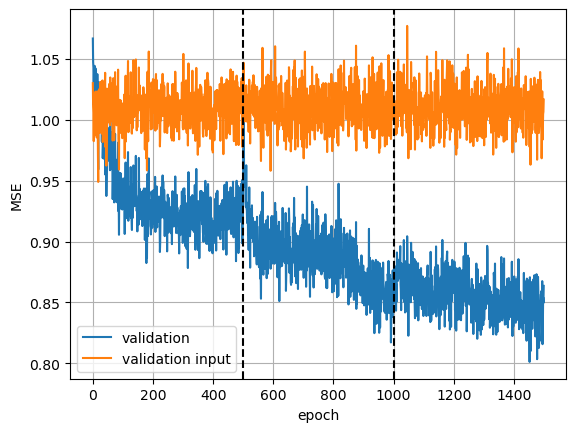

In [25]:
plt.plot(rec['validate_epoch'], rec['validate_mse'], label='validation')
# plt.plot(rec['train_epoch'], rec['train_mse'], label='training')
plt.plot(rec['validate_epoch'], rec['raw_mse'], label='validation input')
plt.legend()
plt.grid()
plt.axvline(500, ls='--', c='k')
plt.axvline(1000, ls='--', c='k')
plt.xlabel('epoch')
plt.ylabel('MSE')

In [13]:
mse_df = pd.DataFrame({'epoch': rec['validate_epoch'], 'mse': rec['validate_mse']})

def epoch2stage(x):
    if x < 250: return 'pre-denoise'
    elif x < 500: return 'denoise'
    elif x < 750: return 'pre-denoise-smooth'
    elif x < 1000: return 'denoise-smooth'
    elif x < 1250: return 'pre-denoise-smooth-enhance'
    elif x < 1500: return 'denoise-smooth-enhance'
    else: raise NotImplementedError('x >= 400 not allowed')

mse_df['stage'] = mse_df['epoch'].apply(epoch2stage)
mse_df

,epoch,mse,stage
0,0,1.066638,pre-denoise
1,1,1.047302,pre-denoise
2,2,1.042766,pre-denoise
3,3,1.012022,pre-denoise
4,4,1.037711,pre-denoise
...,...,...,...
1495,1495,0.815777,denoise-smooth-enhance
1496,1496,0.827869,denoise-smooth-enhance
1497,1497,0.854315,denoise-smooth-enhance
1498,1498,0.849630,denoise-smooth-enhance


C:\Users\lshh\miniconda3\envs\torch_2.0.1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lshh\miniconda3\envs\torch_2.0.1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lshh\miniconda3\envs\torch_2.0.1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


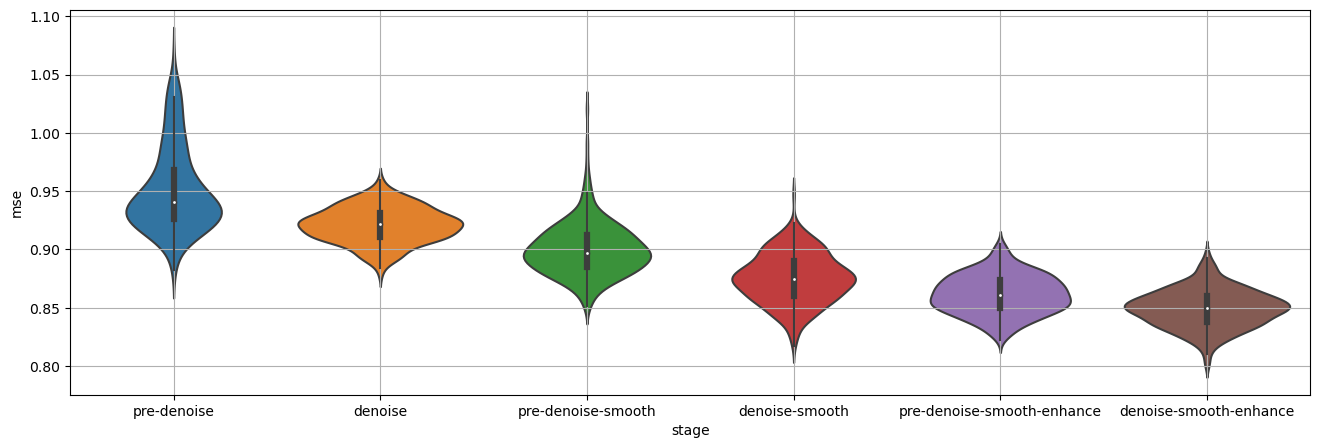

In [14]:
# sns.violinplot(mse_df[~mse_df['stage'].str.contains('pre-')], x='stage', y='mse')
plt.figure(figsize=(16, 5))
sns.violinplot(mse_df, x='stage', y='mse')
plt.grid()

In [15]:
u_stat, p_val = sp.stats.mannwhitneyu(mse_df.loc[mse_df['stage'] == 'denoise', 'mse'], 
                      mse_df.loc[mse_df['stage'] == 'denoise-smooth', 'mse'])

print('p =', p_val, 
      'f =', u_stat / sum(mse_df['stage'] == 'denoise') / sum(mse_df['stage'] == 'denoise-smooth'))

p = 4.2407224189126265e-71 f = 0.9608


In [16]:
u_stat, p_val = sp.stats.mannwhitneyu(mse_df.loc[mse_df['stage'] == 'denoise-smooth', 'mse'], 
                      mse_df.loc[mse_df['stage'] == 'denoise-smooth-enhance', 'mse'])
print('p =', p_val, 
      'f =', u_stat / sum(mse_df['stage'] == 'denoise-smooth') / sum(mse_df['stage'] == 'denoise-smooth-enhance'))

p = 3.098993440412656e-38 f = 0.83416


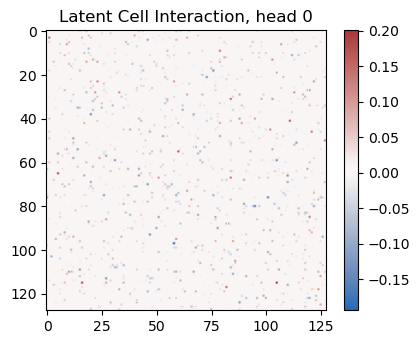

In [17]:
# Plot heatmap of the parameters in cell interaction module

weight_CIs = []
for head in range(len(model.cell_interacts)):
    weight_CIs.append(model.cell_interacts[head].transform.data)

plt.figure(figsize=(10, 8))
for i, weight_CI in enumerate(weight_CIs):
    weight_array = weight_CI.cpu().numpy()
    plt.subplot(2, 2, i + 1)
    plt.imshow(weight_array, cmap='vlag')
    plt.colorbar()
    plt.title(f'Latent Cell Interaction, head {i}')
plt.show()

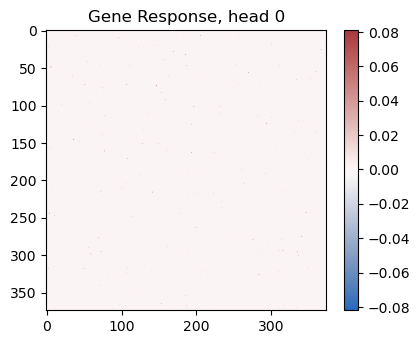

In [18]:
# Plot heatmap of the parameters in gene response module

weight_GRs = []
for head in range(len(model.cell_interacts)):
    weight_GRs.append(model.cell_interacts[head].gene_response.data)

plt.figure(figsize=(10, 8))
for i, weight_GR in enumerate(weight_GRs):
    weight_array = weight_GR.cpu().numpy()
    plt.subplot(2, 2, i + 1)
    plt.imshow(weight_array, cmap='vlag')
    plt.colorbar()
    plt.title(f'Gene Response, head {i}')
plt.show()

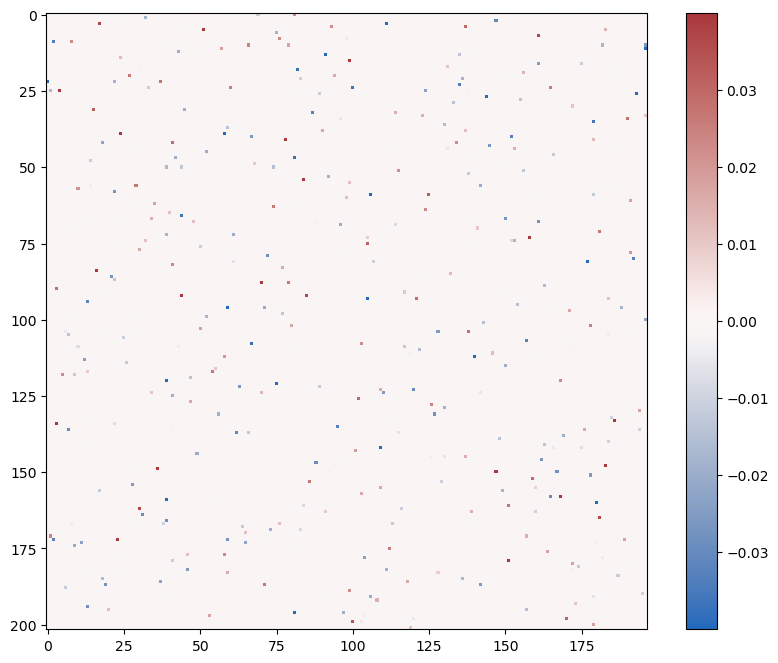

In [19]:
# Extract meaningful weights from Gene Response
THRESHOLD = 0.01

matGR = model.cell_interacts[0].gene_response.data.cpu().numpy()
col_max = np.max(np.abs(matGR), axis=0)
row_max = np.max(np.abs(matGR), axis=1)

meaningfulCols = np.where(col_max > THRESHOLD)[0]
meaningfulRows = np.where(row_max > THRESHOLD)[0]

meaningfulMatGR = matGR[meaningfulRows, :][:, meaningfulCols]

meaningfulMatGR = np.clip(meaningfulMatGR, -.04, .04)

plt.figure(figsize=(10, 8))
plt.imshow(meaningfulMatGR, cmap='vlag')
plt.colorbar()

In [20]:
genesCol = adata.var_names[meaningfulCols]
genesRow = adata.var_names[meaningfulRows]

genesCol, genesRow

(Index(['ENSMUSG00000018381', 'ENSMUSG00000035783', 'ENSMUSG00000024397',
        'ENSMUSG00000017390', 'ENSMUSG00000038115', 'ENSMUSG00000037010',
        'ENSMUSG00000024411', 'ENSMUSG00000031375', 'ENSMUSG00000028487',
        'ENSMUSG00000024164',
        ...
        'ENSMUSG00000068117', 'ENSMUSG00000026222', 'ENSMUSG00000046160',
        'ENSMUSG00000031997', 'ENSMUSG00000026083', 'ENSMUSG00000053007',
        'ENSMUSG00000028370', 'ENSMUSG00000025357', 'ENSMUSG00000045875',
        'ENSMUSG00000038872'],
       dtype='object', length=197),
 Index(['ENSMUSG00000035783', 'ENSMUSG00000020178', 'ENSMUSG00000038115',
        'ENSMUSG00000037010', 'ENSMUSG00000060802', 'ENSMUSG00000048251',
        'ENSMUSG00000036887', 'ENSMUSG00000073418', 'ENSMUSG00000003657',
        'ENSMUSG00000027559',
        ...
        'ENSMUSG00000053007', 'ENSMUSG00000031839', 'ENSMUSG00000045875',
        'ENSMUSG00000055761', 'ENSMUSG00000040612', 'ENSMUSG00000020160',
        'ENSMUSG00000038872', 'ENSM

In [21]:
meaningfulMatGR.shape

(202, 197)

([<matplotlib.axis.YTick at 0x23d1ab47b80>,
 [Text(0, 0, 'ENSMUSG00000060802'),
  Text(0, 1, 'ENSMUSG00000047910'),
  Text(0, 2, 'ENSMUSG00000040612'),
  Text(0, 3, 'ENSMUSG00000039087'),
  Text(0, 4, 'ENSMUSG00000073421'),
  Text(0, 5, 'ENSMUSG00000057738'),
  Text(0, 6, 'ENSMUSG00000030724'),
  Text(0, 7, 'ENSMUSG00000018593'),
  Text(0, 8, 'ENSMUSG00000024376'),
  Text(0, 9, 'ENSMUSG00000068117')])

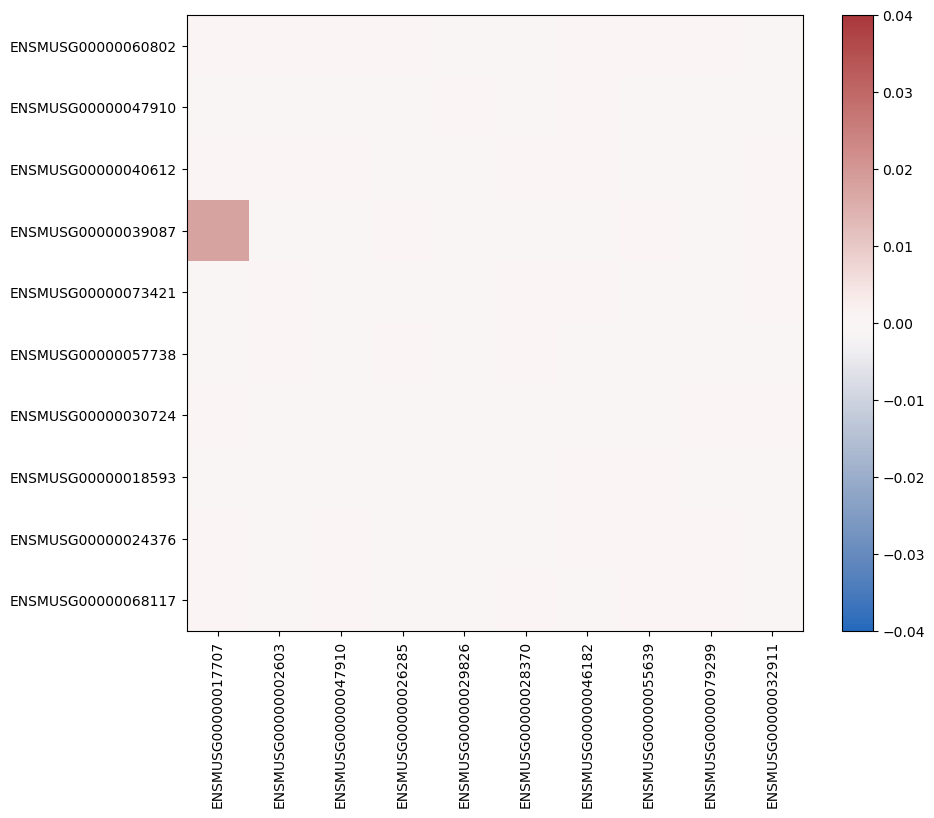

In [22]:
# take out a random patch

PATCH_SIZE = 10

idxCol = np.random.choice(meaningfulMatGR.shape[1], size=PATCH_SIZE, replace=False)
idxRow = np.random.choice(meaningfulMatGR.shape[0], size=PATCH_SIZE, replace=False)

patchMatGR = meaningfulMatGR[idxRow, :][:, idxCol]
patchGeneCol = genesCol[idxCol]
patchGeneRow = genesRow[idxRow]

plt.figure(figsize=(10, 8))
plt.imshow(patchMatGR, cmap='vlag', vmin=-.04, vmax=.04)
plt.colorbar()
plt.xticks(range(PATCH_SIZE), patchGeneCol, rotation=90)
plt.yticks(range(PATCH_SIZE), patchGeneRow)

In [23]:
# # take out a random column

# randColIdx = np.random.choice(meaningfulMatGR.shape[1], size=1, replace=False)
# randCol = meaningfulMatGR[:, randColIdx]
# randGene = genesCol[randColIdx]
# meaningfulY = np.abs(randCol) > THRESHOLD

# randCol = randCol[meaningfulY]

# randGene = randGene[meaningfulY]

# plt.figure(figsize=(10, 8))
# plt.imshow(randCol, cmap='vlag', vmin=-.04, vmax=.04)
# plt.colorbar()
# plt.xticks(range(1), randGene, rotation=90)
# plt.yticks(range(meaningfulMatGR.shape[0]), genesRow)